In [1]:

import json
import pandas as pd
import numpy as np
from src.constants import equity_label, date_index_label, system_titles
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

warnings.filterwarnings('ignore')

with open('./project_config.json', 'r') as config_file:
    config = json.load(config_file)

ts_path = config['data']['time_series_stats_path']
tickers = config['tickers']
initial_cash = config['strategy']['initial_cash']

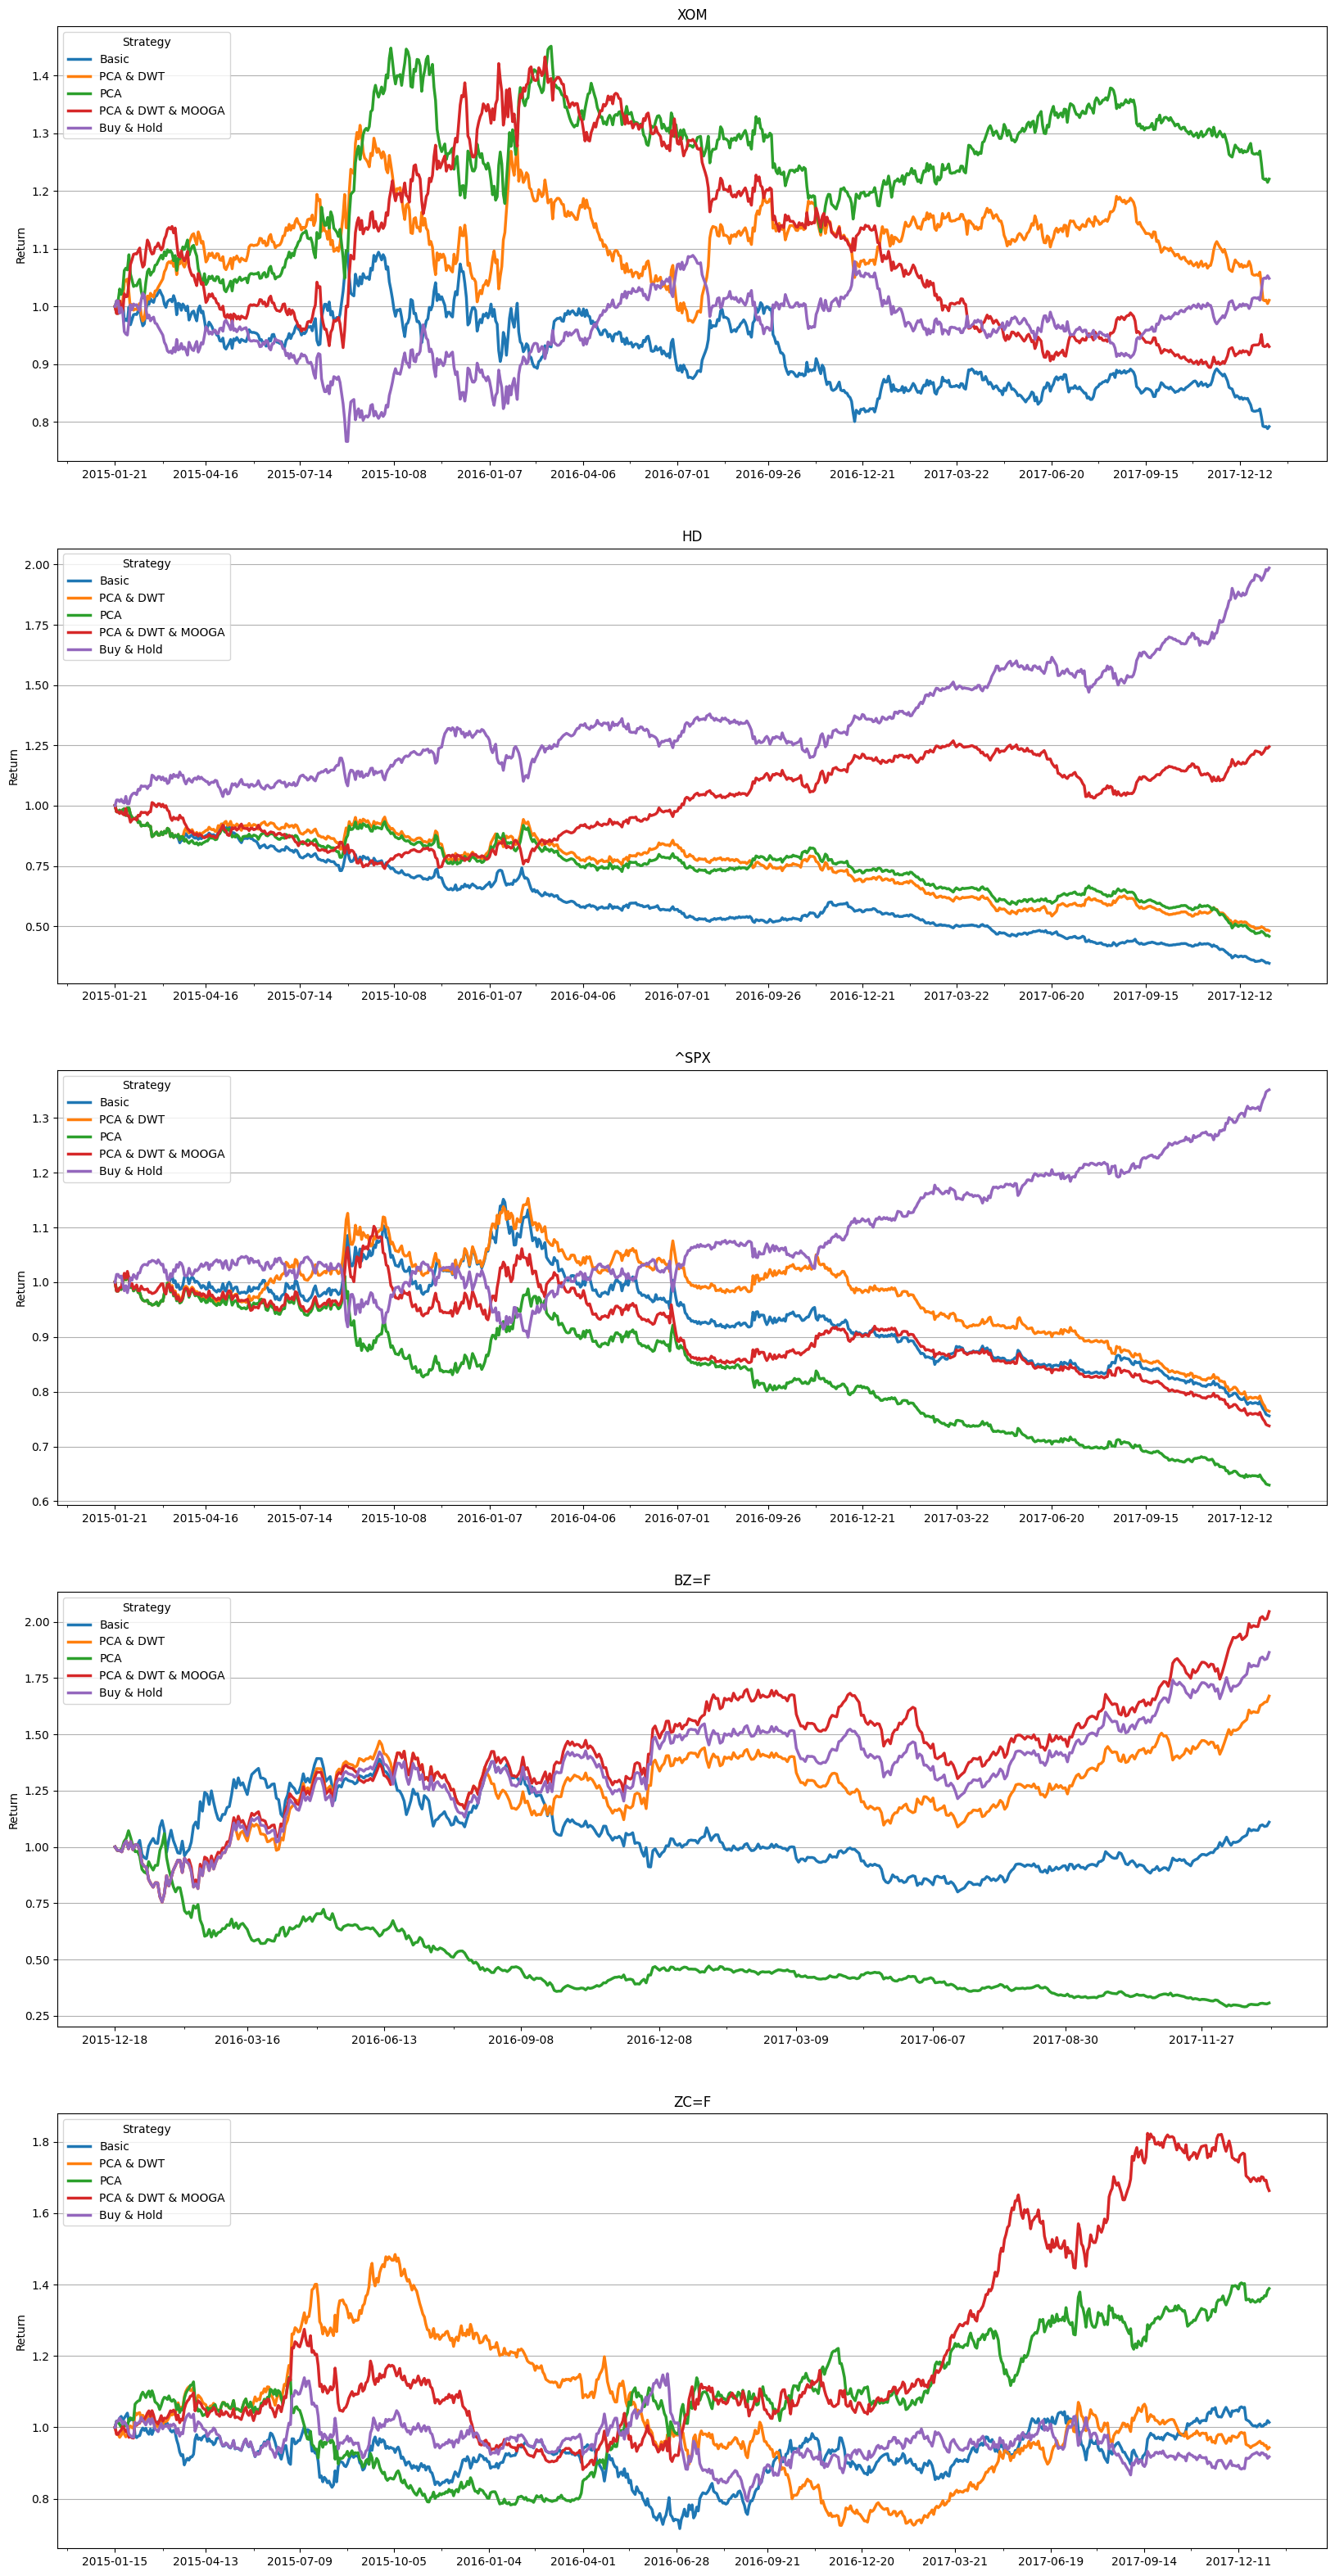

In [2]:
fig, axs = plt.subplots(len(tickers), 1, figsize=(20, 40))

for ticker, ax in zip(tickers, axs):
    equity_df = pd.read_csv(f'{ts_path}/{equity_label}/{ticker}.csv')
    equity_df.rename(columns=system_titles, inplace=True)

    strategies = set(equity_df.columns.values)
    strategies.remove(date_index_label)
    strategies = list(strategies)

    equity_df[strategies] = equity_df[strategies] / initial_cash

    equity_melted_df = pd.melt(
        equity_df, id_vars=[date_index_label], value_vars=strategies
    )

    sns.lineplot(
        equity_melted_df,
        x=date_index_label,
        y='value',
        hue='variable',
        ax=ax,
        linewidth=2.5,
    )
    ax.title.set_text(ticker)
    ax.set_ylabel('Return')
    ax.set_xlabel('')
    ax.legend(title='Strategy')
    ax.grid(axis='y')
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

fig.show()